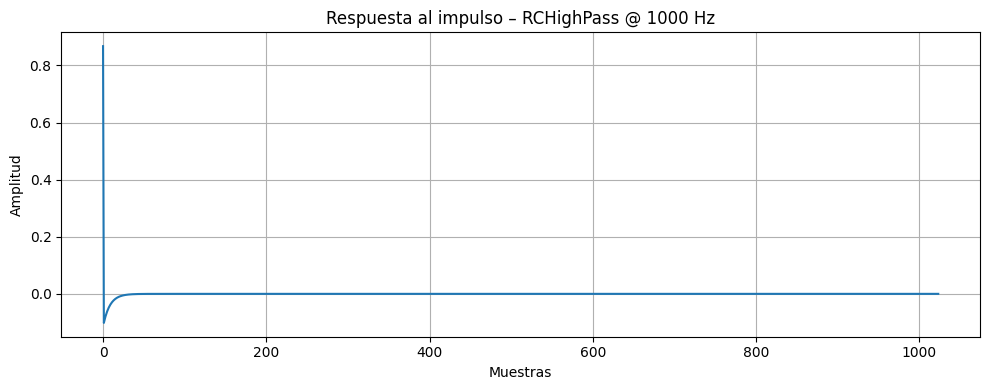

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from filters.rc_highpass import RCHighPass  # asegúrate de que el path es correcto

# Parámetros
fs = 48000
cutoff = 1000  # Hz

# Instanciar el filtro
hp = RCHighPass(fs=fs, cutoff=cutoff)

# Generar señal de prueba: impulso
N = 1024
impulse = np.zeros(N)
impulse[0] = 1.0  # Dirac

# Procesar
output = hp.process_block(impulse)

# Visualizar en el tiempo
plt.figure(figsize=(10, 4))
plt.plot(output)
plt.title(f"Respuesta al impulso – RCHighPass @ {cutoff} Hz")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.tight_layout()
plt.show()


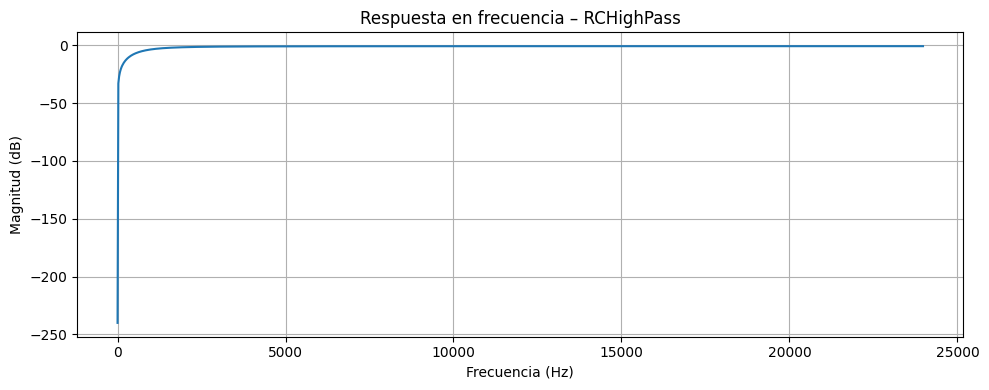

In [4]:
from scipy.fft import fft, fftfreq

fft_size = 2048
freqs = fftfreq(fft_size, 1 / fs)[:fft_size // 2]
spectrum = fft(output, fft_size)[:fft_size // 2]
magnitude_db = 20 * np.log10(np.abs(spectrum) + 1e-12)

plt.figure(figsize=(10, 4))
plt.plot(freqs, magnitude_db)
plt.title("Respuesta en frecuencia – RCHighPass")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()
plt.tight_layout()
plt.show()


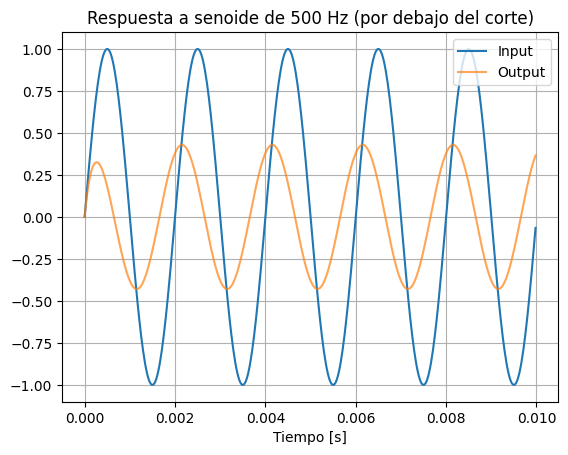

In [5]:
t = np.arange(0, 0.01, 1/fs)
x = np.sin(2 * np.pi * 500 * t)  # por debajo del cutoff
y = hp.process_block(x)

plt.plot(t, x, label="Input")
plt.plot(t, y, label="Output", alpha=0.7)
plt.legend()
plt.title("Respuesta a senoide de 500 Hz (por debajo del corte)")
plt.xlabel("Tiempo [s]")
plt.grid()
plt.show()
